### Лабораторна робота №2: "Імплементація алгоритмів стиснення"

Склад команди та розподіл виконаних завдань:

- Басистий Олег - LZ77, Huffman, Deflate
- Вероніка Багатир-Захарченко - LZW


# Допоміжне

Допоміжні функції, імпорти тощо, аби забезпечити роботу тестувального функціоналу.

In [2]:
import matplotlib.pyplot as plt
import time
import random
from tqdm import tqdm

In [3]:
with open("/home/oleh/programming/Coding-Algorithms/eneida.txt",'r',encoding='utf-8') as f:
    eneida=f.read()
SYMBOLS="ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz1234567890 "
lorem_ipsum="""
Lorem ipsum dolor sit amet, consectetur adipiscing elit,
 sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim
 ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip
 ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate
 velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat
 cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
"""
the_car_is_on_fire="""
The car's on fire and there's no driver at the wheel
And the sewers are all muddied with a thousand lonely suicides
And a dark wind blows

The government is corrupt
And we're on so many drugs
With the radio on and the curtains drawn

We're trapped in the belly of this horrible machine
And the machine is bleeding to death

The sun has fallen down
And the billboards are all leering
And the flags are all dead at the top of their poles

It went like this:

The buildings toppled in on themselves
Mothers clutching babies
Picked through the rubble
And pulled out their hair

The skyline was beautiful on fire
All twisted metal stretching upwards
Everything washed in a thin orange haze
I said, "Kiss me, you're beautiful
These are truly the last days"

You grabbed my hand
And we fell into it
Like a daydream
Or a fever

We woke up one morning and fell a little further down
For sure as the valley of death
I open up my wallet
And it's full of blood
"""

In [4]:
def random_generated_sequence(symbols, length):
    return ''.join(random.choice(symbols) for _ in range(length))
random_generated_sequence(SYMBOLS, 10)

'gdNT0zMtF4'

In [5]:
def test_multiple(functions,VALS,ITERATIONS,symbols,names):
    time_list=[[0] for _ in range(len(functions))]
    for value in tqdm(VALS):
        tmp_time=[0 for _ in range(len(functions))]
        for _ in range(ITERATIONS):
            tmp_graph=random_generated_sequence(symbols,value)
            for func in functions:
                start=time.time()
                func(tmp_graph)
                tmp_time[functions.index(func)]+=time.time()-start
        for i, val in enumerate(tmp_time):
            time_list[i].append(val/ITERATIONS)
            
    lines=[]
    VALS=[0]+VALS
    plt.xlabel('Values')
    plt.ylabel('Runtime')
    print(time_list[0])
    print(VALS)
    for i in range(len(functions)):
        plt.plot(VALS,time_list[i],label=names[i])
    plt.legend()
    plt.xticks(VALS)
    plt.show()

In [6]:
def compression_graph(vals,compressed):
    plt.xlabel('Values')
    plt.ylabel('Compression')
    plt.plot(vals,compressed)
    plt.legend()
    plt.xticks(vals)
    plt.show()

# Алгоритм Гаффмана

Концепт алгоритму Гаффмана полягає в знаходженні частоти усіх символів та побудови бінарного дерева з, в якому кожному з елементів списку частот присваюється якийсь певний код.  
У більш просунутих версіях алгоритму, можна шукати частоти не поодиноких елементів, а сукупністю елементів, з чого випливе краще стиснення.  
У нашому ж випадку, ми шукаємо частоту кожного символу у заданому тексті.

In [6]:
"""
Huffman coding algorithm
"""
from heapq import heappush, heappop
class Node:
    """
    Node class
    """
    def __init__(self, freq, char, left=None, right=None):
        self.char=char
        self.freq=freq
        self.left=left
        self.right=right
        self.direction=""
    def __lt__(self, other):
        return self.freq<other.freq
class Huffman:
    """
    Huffman coding algorithm
    """
    def encode(self, data):
        """
        Huffman encode
        """
        frequencies=self.frequency(data)
        nodes=[]
        for k,v in frequencies.items():
            heappush(nodes,Node(v,k))
        while len(nodes)!=1:
            left=heappop(nodes)
            right=heappop(nodes)
            left.direction="0"
            right.direction="1"
            heappush(nodes,Node(left.freq+right.freq, left.char+right.char, left, right))
        codes=dict(sorted(self.build_tree(nodes[0]).items(), key=lambda x:x[1],reverse=True))
        encoded_data=''.join(list(map(lambda x:codes[x], data)))
        return encoded_data,codes
    def build_tree(self, node, code=""):
        """
        Build huffman tree
        """
        codes={}
        code+=node.direction
        if node.left:
            left=self.build_tree(node.left, code)
            codes.update(left)
        if node.right:
            right=self.build_tree(node.right, code)
            codes.update(right)
        if not node.left and not node.right:
            codes[node.char]=code
        return codes

    def frequency(self, data):
        """
        Find each char's frequency
        """
        freq={}
        for i in set(data):
            freq[i]=data.count(i)
        return freq
    def decode(self, data, dictionary):
        """
        Huffman decode
        """
        decoded_data=""
        tmp=""
        for char in data:
            tmp+=char
            if tmp in dictionary.values():
                decoded_data+=list(dictionary.keys())[list(dictionary.values()).index(tmp)]
                tmp=""
        return decoded_data
    @staticmethod
    def calculate_compression(compressed_data, dictionary, original_data):
        """
        Calculate compression ratio
        """
        dict_size=sum([8+len(v) for k,v in dictionary.items()])
        return (8*len(original_data))/(len(compressed_data)+dict_size)*100

Задля реалізації алгоритму, ми вирішили використати модуль heapq, так як за допомогою нього ми можемо швидше оперувати з елементами.  
Замість heapq, можна було б брати й кожен раз сортувати список та брати мінімальні елементи, але результатом цього буде довший час виконання.  
У нашому випадку, це не є настільки критично, так як розмір наших масивів не є настільки великим. Але, при реалізації кращого розподілу по частотам, heapq сильно би допоміг у оптимізації алгоритму.

##### Тест коректності кодування

In [10]:
g=Huffman()
data="daaaab"
print(g.encode(data))
print(g.decode(*g.encode(data)))
print(Huffman.calculate_compression(*g.encode(data), data))
print(g.encode(data)[0],data)
encoded=g.encode(eneida)
print(g.decode(*encoded)==eneida)

('00111101', {'a': '1', 'b': '01', 'd': '00'})
daaaab
129.72972972972974
00111101 daaaab
True


##### Тест стиснення

In [11]:
print(Huffman.calculate_compression(*encoded, eneida))

158.3576478931221


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


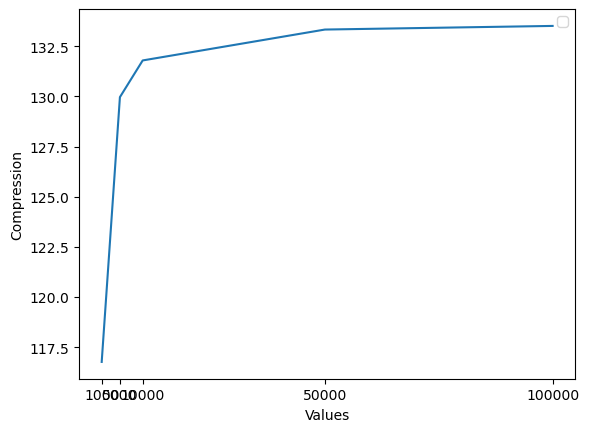

In [12]:
huff=Huffman()
values=[
    random_generated_sequence(SYMBOLS,1000),
    random_generated_sequence(SYMBOLS,5000),
    random_generated_sequence(SYMBOLS,10000),
    random_generated_sequence(SYMBOLS,50000),
    random_generated_sequence(SYMBOLS,100000)
    ]
compress=[huff.calculate_compression(*huff.encode(i),i) for i in values]
compression_graph([len(i) for i in values],compress)

##### Тест рантайму

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<00:00, 16.85it/s]

[0, 2.6464462280273438e-05, 0.00010673999786376953, 0.00019011497497558593, 0.0010593652725219727, 0.0077228546142578125]
[0, 10, 100, 1000, 10000, 100000]


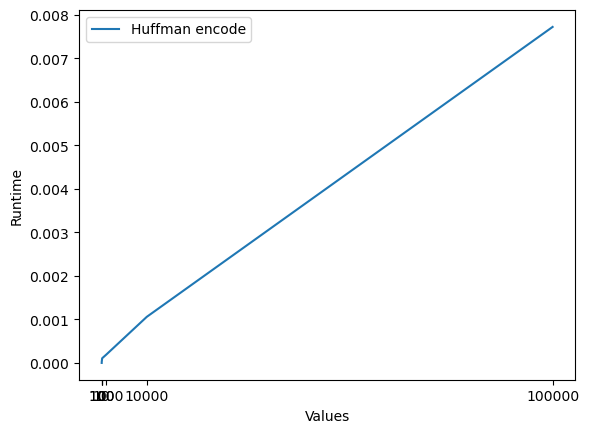

In [13]:
test_multiple([g.encode], [10,100,1000,10000,100000], 10, SYMBOLS, ["Huffman encode"])

100%|██████████| 3/3 [00:38<00:00, 13.00s/it]

[0, 0.0701209545135498, 0.3623481512069702, 0.7168845415115357]
[0, 1000000, 5000000, 10000000]


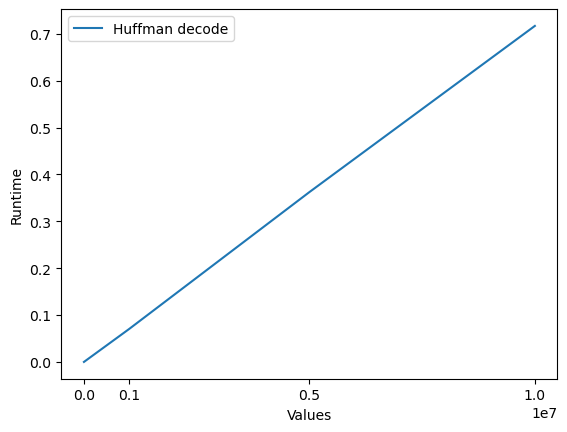

In [14]:
test_multiple([g.encode], [1000000, 5000000, 10000000], 10, SYMBOLS, ["Huffman decode"])

##### Висновки

Стиснення за Гаффманом працюватиме краще, якщо в тексті частота певного елементу сильно переважатиме ніж інші, або ж якщо знайти такий розподіл, у якому частота однієї комірки (2+ елементів) буде переважати за частоту інших.  
Попри те, що ми шукаємо частоту по простому, наша імплементація доволі добре кодує початковий текст.  
Також, алгоритм Гаффмана є зручним для декодування, так як словник займає небагато місця у пам'яті.

# Алгоритм LZW

LZW динамічно біжить по даним, які в нас є та заповнює певний словник. Кожному елементу словнику присваюється якесь числове значення. Він дивиться на послідуючий елемент у даних. Якщо елементу a_i a_i+1 немає у словнику - додає його, інакше продовжує пошук елемента, якого нема в ньому.  
Якщо LZW знаходить елемент, якого немає у словнику, він додає в закодований список нашу послідовність без останнього символу. Саму послідовність записує у словник та починає пошук з його останнього елементу. І так, допоки не дійде до кінця стрічки.

In [7]:
"""
LZW encoding algorithm
"""
class LZW:
    """
    LZW
    """
    @staticmethod
    def encode(data):
        """
        LZW encoding
        """
        if not data:
            return []
        decode_dict={sym: i for i,sym in enumerate(sorted(list(set(data))))}
        curr_char=data[0]
        encoded_text=[]
        for i,_ in enumerate(data):
            next_char=data[i+1] if i!=len(data)-1 else ""
            if curr_char+next_char in decode_dict:
                curr_char+=next_char
            else:
                encoded_text.append(decode_dict[curr_char])
                decode_dict[curr_char+next_char]=max(decode_dict.values())+1
                curr_char=next_char
        encoded_text.append(decode_dict[curr_char])
        return encoded_text, sorted(list(set(data)))
    @staticmethod
    def decode(data, decode_dict):
        """
        LZW decoding
        """
        decode_dict=dict(enumerate(decode_dict))
        curr_code=data[0]
        curr_char=decode_dict[curr_code]
        tmp=curr_char[0]
        decoded=curr_char
        for i in range(len(data)-1):
            next_char=data[i+1]
            if next_char not in decode_dict:
                curr_char=decode_dict[curr_code]+tmp
            else:
                curr_char=decode_dict[next_char]
            decoded+=curr_char
            tmp=curr_char[0]
            decode_dict[max(decode_dict)+1]=decode_dict[curr_code]+tmp
            curr_code=next_char
        return decoded
    @staticmethod
    def calculate_compression(encoded_text,encoded_dict,initial_text):
        byte_size_text=sum(len(bin(i))-2 for i in encoded_text)
        byte_size_dict=len(encoded_dict)*8
        return len(initial_text)*8/(byte_size_dict+byte_size_text)*100

In [8]:
print(LZW.decode(*LZW.encode("icanttakeitanymore")))

icanttakeitanymore


In [9]:
print(LZW.decode(*LZW.encode('ааааааааа'))=='ааааааааа')

True


In [10]:
print(LZW.encode('aaa'))
print(LZW.decode(*LZW.encode("aaa")))

([0, 1], ['a'])
aaa


##### Тест коректності кодування

In [11]:
print(LZW.decode(*LZW.encode('ICANTTAKEITANYMORE')))
print(LZW.decode(*LZW.encode(eneida))==eneida)

ICANTTAKEITANYMORE


##### Тест стиснення

In [20]:
lzw_msg="aaaaaaaaaaaaaaaaaaaahahahhahahhahahhaahh"
print(LZW.calculate_compression(*LZW.encode(eneida),eneida))

228.08718383740455


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


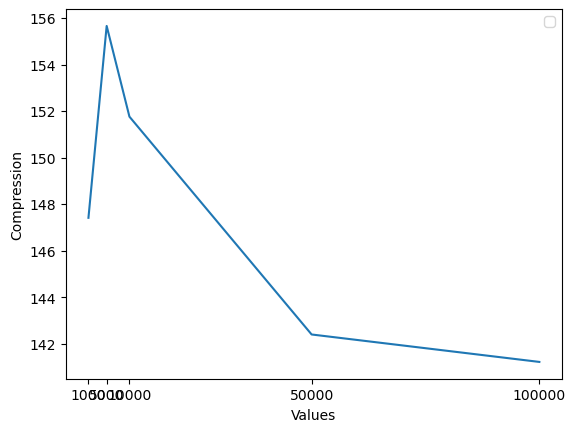

In [21]:
LZW.calculate_compression(*LZW.encode(lzw_msg),lzw_msg)
values=[
    random_generated_sequence(SYMBOLS,1000),
    random_generated_sequence(SYMBOLS,5000),
    random_generated_sequence(SYMBOLS,10000),
    random_generated_sequence(SYMBOLS,50000),
    random_generated_sequence(SYMBOLS,100000)
    ]
compress=[LZW.calculate_compression(*LZW.encode(i),i) for i in values]
compression_graph([len(i) for i in values],compress)

Тест рантайму

  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:00<00:00, 166.09it/s]

[0, 0.000255131721496582, 0.000534963607788086, 0.0007922172546386719]
[0, 100, 200, 300]


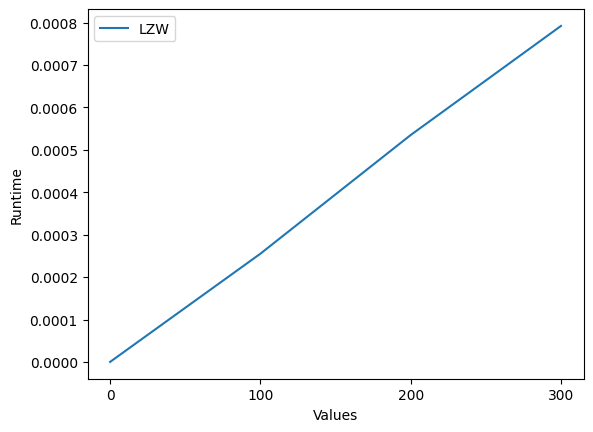

In [19]:
VALS = [100, 200, 300]
ITERATIONS = 10
names = ["LZW"]
functions = [LZW.encode]
test_multiple(functions, VALS, ITERATIONS, SYMBOLS, names)

Висновки

Час виконання залежить від розміру вхідних даних. Для більших розмірів даних може знадобитися більше часу для обробки.
Чим більше відношення стиснення, тим ефективніше алгоритм. В даному випадку можна порівняти результати стиснення для різних розмірів вхідних даних.
Алгоритм працює з різними видами вхідних даних без значних втрат продуктивності або ефективності стиснення.

# Алгоритм LZ77


Алгоритм LZ77 працює наступним чином:
1) У нього є якесь вікно (текст, який треба закодувати, іноді його обмежують по довжині, але в нашому випадку) він не обмежується.  
2) У нього є буфер, який є обмеженим.
3) Ми перебігаєм по елементам вікна. Якщо цей елемент є у буфері, ми з нього починаємо шукати інші символи, які метчаться. Робимо так, поки не переберем всі елементи.
4) Зрештою, записуємо найдовший метч у буфер та кодуємо його триплетом (Offset, Distance, Char), де Offset - відстань символа в буфері, Distance - довжина метчу, char - символ, який закодували.

<br>Так продовжуємо, допоки не переберемо всі символи.


In [8]:
class Lz77:
    """
    Lz77 coding alghorithm
    """
    def __init__(self, buffer):
        self.buffer_size=buffer
    def encode(self, data):
        """
        Encode a string using lz77
        """
        codings=[]
        buffer=""
        while len(data)!=0:
            match,ind=self.find_best_match(data,buffer)
            if match:
                data=data[len(match):]
                codings.append((ind,len(match),data[0] if data else ""))
                buffer+=match+data[0] if data else match
                buffer=buffer[-self.buffer_size:]
                data=data[1:]
            else:
                codings.append((0,0,data[0]))
                buffer+=data[0]
                buffer=buffer[-self.buffer_size:]
                data=data[1:]
        return codings
    def find_best_match(self, data, buffer):
        """
        Finds longest match between data and buffer
        """
        if not data or not buffer:
            return "",None
        _match=""
        max_ind=0
        if buffer==data[:len(buffer)]:
            for i,el in enumerate(data):
                if el==buffer[i%len(buffer)]:
                    _match+=el
                else:
                    break
            return _match, len(buffer)
        for i,el in enumerate(buffer):
            curr_match=""
            if el==data[0]:
                curr_match=el
                ind=0
                for j in range(i+1,len(buffer)):
                    ind+=1
                    if ind+1<=len(data) and data[ind]==buffer[j]:
                        curr_match+=data[ind]
                    else:
                        break
                if len(curr_match)>len(_match):
                    _match=curr_match
                    max_ind=i
        return _match, len(buffer)-max_ind

    def decode(self, data):
        """
        Decode a string using lz77
        """
        msg=""
        for el in data:
            if el[0]==0:
                msg+=el[2]
            else:
                if el[1]>el[0]:
                    div=el[1]//el[0]
                    mod=el[1]%el[0]
                    msg+=msg[-el[0]:]*div+msg[-el[0]:-el[0]+mod]
                    el=el[0],el[1]%el[0],el[2]
                msg+=msg[-el[0]:len(msg)-el[0]+el[1]]+el[2]
        return msg
    @staticmethod
    def calculate_compression(encoded, original):
        """
        Calculate compression ratio
        (4 bits for distance, 4 bits for length, 8 bits for char)*len / (8 bits for char)*len
        """
        encoded_len=0
        for o,d,c in encoded:
            encoded_len+=len(bin(o))-2+len(bin(d))-2+8
        return len(original)*8/encoded_len*100

### Тестування LZ77

##### Тест кодування та декодування

In [23]:
lz=Lz77(10000)
msh=lz.encode("aababcabcabcabcabcabc")
print(lz.decode(msh)=="aababcabcabcabcabcabc")
print(lz.decode(lz.encode("icanttakeitanymoreee")))
print(lz.decode(lz.encode(lorem_ipsum))==lorem_ipsum)
print(lz.calculate_compression(lz.encode(lorem_ipsum),lorem_ipsum))
lz_encoded=lz.encode(eneida)
print(lz.decode(lz_encoded)==eneida)

True
icanttakeitanymoreee
True
135.73573573573574
True


##### Тест стиснення

In [24]:
lz.calculate_compression(lz_encoded,eneida)

161.0730870405953

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


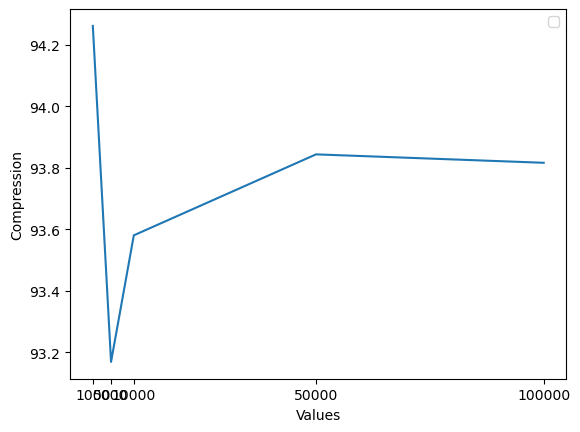

In [25]:
lz77=Lz77(1024)
values=[
    random_generated_sequence(SYMBOLS,1000),
    random_generated_sequence(SYMBOLS,5000),
    random_generated_sequence(SYMBOLS,10000),
    random_generated_sequence(SYMBOLS,50000),
    random_generated_sequence(SYMBOLS,100000)
    ]
compress=[lz77.calculate_compression(lz77.encode(i),i) for i in values]
compression_graph([len(i) for i in values],compress)

##### Тест рантайму

100%|██████████| 3/3 [00:09<00:00,  3.05s/it]

[0, 7.543563842773437e-05, 0.0007543563842773438, 0.009086537361145019]
[0, 100, 1000, 10000]


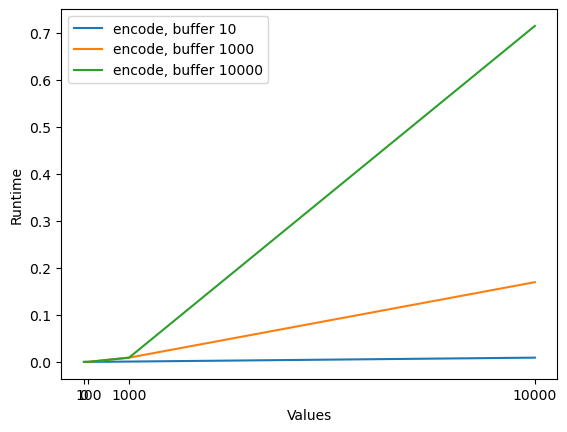

In [26]:
test_multiple([Lz77(10).encode,Lz77(1000).encode,Lz77(10000).encode],[100,1000,10000],\
              10,SYMBOLS,["encode, buffer 10", "encode, buffer 1000", "encode, buffer 10000"])

### Висновки

Проаналізувавши графіки, ми можемо побачитим, що час виконання алгоритму напряму залежить від розміру буфера.  
Також, найкращими умовами для алгоритму є багато повторюваного тексту, який йде в ряд (Пр. abcabcabcabcabcabcabcabcabcabc).  
Саме за умов невеликого буферу та великої кількості тексту, що повторюється, кодування за LZ77 буде найбільш ефективним.  

# Алгоритм Deflate

Цей алгоритм поєднує в собі два інші алгоритми кодування, задля кращого стиснення.  
Спочатку, ми кодуємо повідомлення за Lz77. Згодом, переводимо повідомлення в стрічку. Після цього, закодовуємо це повідомлення у 0 і 1 за Гаффманом.  
Менш стандартною імлементацією є першочергове кодування за Гаффманом, та кодування за Lz77, але варіант, імплементований нами є більш прийнятим.

In [9]:
class Deflate:
    def __init__(self, buffer_size: int):
        self.buffer_size=buffer_size
        self.lz=Lz77(buffer_size)
        self.huffman=Huffman()

    def encode(self, text: str) -> str:
        msg=self.lz.encode(text)
        return self.huffman.encode(self._list_to_text(msg))

    def decode(self, code: str, dictionary: dict) -> str:
        decoded=self.huffman.decode(code,dictionary)
        msg=self._text_to_list(decoded)
        return self.lz.decode(msg)
    
    def calculate_compression(self, code: str, dictionary: dict, original: str) -> float:
        return self.huffman.calculate_compression(code, dictionary, original)

    @staticmethod
    def _list_to_text(lst):
        str_lst=[str(i[0])+'\0'+str(i[1])+'\0'+i[2] for i in lst]
        return '\0'.join(str_lst)
        
    @staticmethod
    def _text_to_list(text):
        new=text.split('\0')
        res=[]
        for i in range(0,len(new),3):
            try:
                res.append((int(new[i]),int(new[i+1]),new[i+2] if i+2<=len(new) else ''))
            except:
                print(i)
        return res

##### Тест коректності кодування

In [13]:
deflate=Deflate(10000)
print(deflate.decode(*deflate.encode("IcantTakeita Anymroe ((( )))XXX")))
# print(lz77.encode('abababbaba'))
print(Deflate._list_to_text(lz77.encode('abababbaba')))
print(Deflate._text_to_list(Deflate._list_to_text(lz77.encode('abababbaba'))))
print(Deflate._text_to_list(Deflate._list_to_text(lz77.encode(lorem_ipsum)))==lz77.encode(lorem_ipsum))

print(deflate.decode(*deflate.encode(the_car_is_on_fire)))
print(deflate.decode(*deflate.encode(the_car_is_on_fire))==the_car_is_on_fire)

IcantTakeita Anymroe ((( )))XXX
0 0 a 0 0 b 2 4 b 7 3 
[(0, 0, 'a'), (0, 0, 'b'), (2, 4, 'b'), (7, 3, '')]
True

The car's on fire and there's no driver at the wheel
And the sewers are all muddied with a thousand lonely suicides
And a dark wind blows

The government is corrupt
And we're on so many drugs
With the radio on and the curtains drawn

We're trapped in the belly of this horrible machine
And the machine is bleeding to death

The sun has fallen down
And the billboards are all leering
And the flags are all dead at the top of their poles

It went like this:

The buildings toppled in on themselves
Mothers clutching babies
Picked through the rubble
And pulled out their hair

The skyline was beautiful on fire
All twisted metal stretching upwards
Everything washed in a thin orange haze
I said, "Kiss me, you're beautiful
These are truly the last days"

You grabbed my hand
And we fell into it
Like a daydream
Or a fever

We woke up one morning and fell a little further down
For sure as t

##### Тест стиснення

In [36]:
print(deflate.calculate_compression(*deflate.encode(eneida),eneida))

110.25166109713305


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


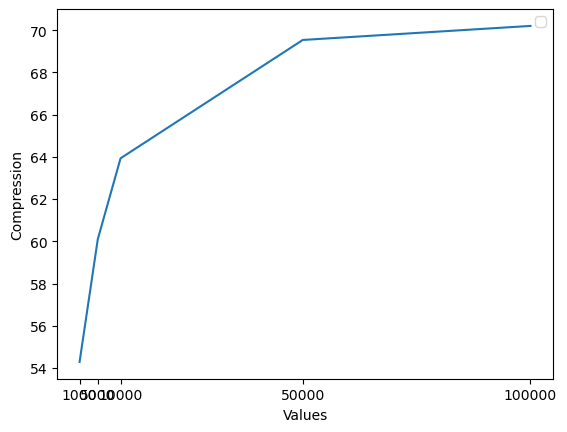

In [35]:
values=[
    random_generated_sequence(SYMBOLS,1000),
    random_generated_sequence(SYMBOLS,5000),
    random_generated_sequence(SYMBOLS,10000),
    random_generated_sequence(SYMBOLS,50000),
    random_generated_sequence(SYMBOLS,100000)
    ]
compress=[deflate.calculate_compression(*deflate.encode(i),i) for i in values]
compression_graph([len(i) for i in values],compress)

##### Тест рантайму

100%|██████████| 3/3 [01:08<00:00, 22.68s/it]

[0, 0.010102987289428711, 0.7067043781280518, 12.867955446243286]
[0, 1000, 10000, 100000]


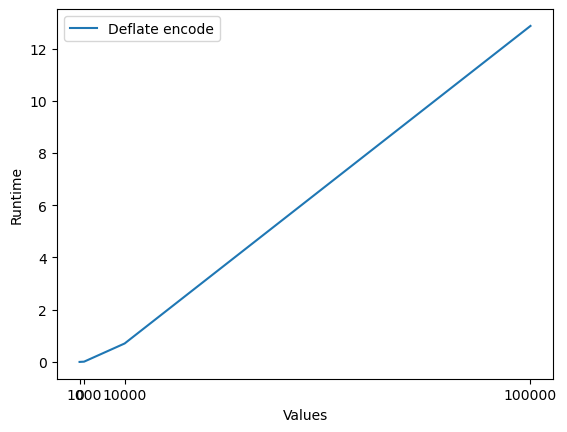

In [14]:
test_multiple([deflate.encode],[1000,10000,100000],5,SYMBOLS,["Deflate encode"])

##### Висновки
Наша імплементація deflate є доволі поганою, так як вона попросту переводить код з Lz77 в Huffman. Задля того, щоб покращити час виконання, потрібно робити повний варіант цього алгоритму, з врахуванням усіх нюансів, але це зайняло б забагато часу навіть, щоб просто розібратись.  
Для великих текстів з повторюваними символами, Deflate все одно працює не так погано, але гірше, ніж Lz77 і Huffman поодинці. :(

# Загальні висновки

  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [01:11<00:00, 23.87s/it]

[0, 0.009382915496826173, 0.18043766021728516, 1.9768471717834473]
[0, 1000, 10000, 100000]


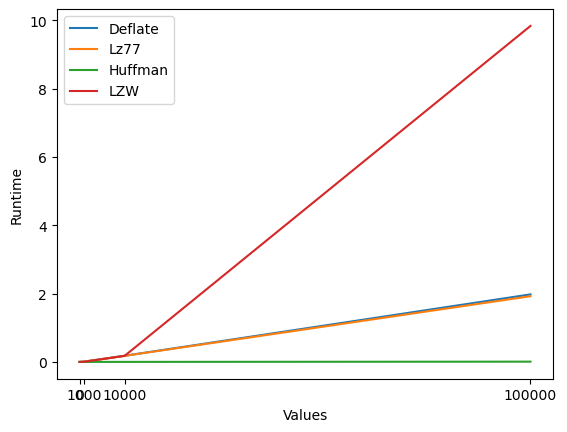

In [12]:
deflate = Deflate(1024)
lz77=Lz77(1024)
lzw=LZW()
huffman=Huffman()
test_multiple([deflate.encode,lz77.encode,huffman.encode,lzw.encode],[1000,10000,100000],5,SYMBOLS,["Deflate", "Lz77", "Huffman", "LZW"])

Проаналізувавши те, як працює кожен з імлементованих нами алгоритмів, можна зробити кілька висновків.
1) Кодування за Хафмманом - один з найкращих варіантів, у відношені compression / runtime. 
2) Найбільш оптимальним за стисненням є наша імплементація LZW. Вона завжди показувала хороше стиснення, незважаючи на інпут.
3) LZ77 непогано кодує дані, у яких дуже багато повторів, які йдуть поспіль. Звичайний же текст кодує по принципу: більший буфер і більший обсяг => більше стиснення.
4) Наша імплементація Deflate є доволі поганою. Задля кращої реалізації варто використовувати більш складні техніки з розбиттям бітів на блоки (як показано в Вікіпедії). Працює трохи гірше, ніж LZ77, і за такими ж принципами.